In [6]:
library(tidyverse)

library(grid)
library(gridExtra)
library(patchwork)

source("/home/yuliya/repos/other/removeBatch/evaluation_utils/plots_eda.R")
source("/home/yuliya/repos/other/removeBatch/evaluation_utils/evaluation_funcs.R")

In [7]:
cbPalette <- c("#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")

# Load data

In [9]:
data_path <- "..//evaluation_data/microbiome_v2/"

central_uncorrected <- read.csv(paste0(data_path, "before/logmin_normalized_counts_5C.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
metadata <- read.csv(paste0(data_path, "before/metadata_5C.tsv"), sep = "\t", header = TRUE, row.names = 1)

central_corrected <- read.csv(paste0(data_path, "after/normalized_logmin_counts_5centers_Rcorrected.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
fed_corrected <- read.csv(paste0(data_path, "after/FedApp_corrected_data.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)

rownames(metadata) <- metadata$sample

# remove X from row names
rownames(metadata) <- gsub("X", "", rownames(metadata))
metadata$file <- rownames(metadata)
# order the columns in intensity dataframes
central_uncorrected <- central_uncorrected[, rownames(metadata)]

central_corrected <- central_corrected[rownames(central_uncorrected), rownames(metadata)]
fed_corrected <- fed_corrected[rownames(central_uncorrected), rownames(metadata)]

cat("Loaded data")
cat("Central corrected:", nrow(central_corrected), "rows\n")
cat("Central uncorrected:", nrow(central_uncorrected), "rows\n")
cat("Fed corrected:", nrow(fed_corrected), "rows\n")
cat("Sample metadata:", nrow(metadata), "rows\n\n")



Loaded dataCentral corrected: 755 rows
Central uncorrected: 755 rows
Fed corrected: 755 rows
Sample metadata: 526 rows



# Checks

## Diagnostic plots

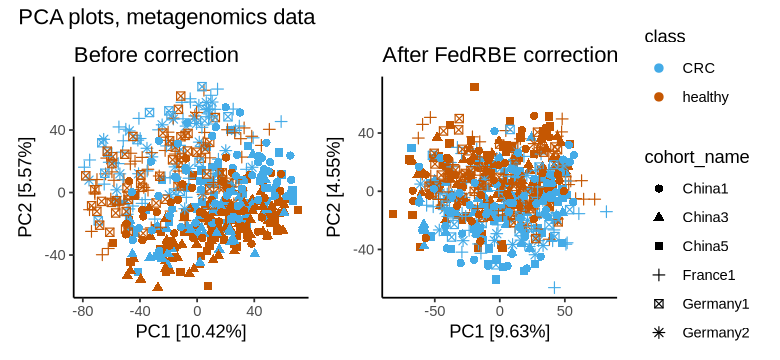

In [28]:
pca_plot_uncorrected <- pca_plot(central_uncorrected, metadata, 
    title = "Before correction",
    quantitative_col_name = "sample", col_col = "class", shape_col="cohort_name", 
    cbPalette=c("#44abe7", "#c55702"),
    show_legend=F)

# pca_plot_corrected <- pca_plot(central_corrected, metadata, 
#     title = "After central correction",
#     quantitative_col_name = "sample", col_col = "class", shape_col="study_accession", 
#     cbPalette=c("#44abe7", "#c55702"),
#     show_legend=F)
pca_plot_fed <- pca_plot(fed_corrected, metadata, 
    title = "After FedRBE correction",
    quantitative_col_name = "sample", col_col = "class", shape_col = "cohort_name",
    cbPalette=c("#44abe7", "#c55702"),
    show_legend=T)

layout <- (pca_plot_uncorrected + pca_plot_fed)
# add layout plot title
layout <- layout + plot_annotation("PCA plots, metagenomics data")

options(repr.plot.width=6.5, repr.plot.height=3)
layout

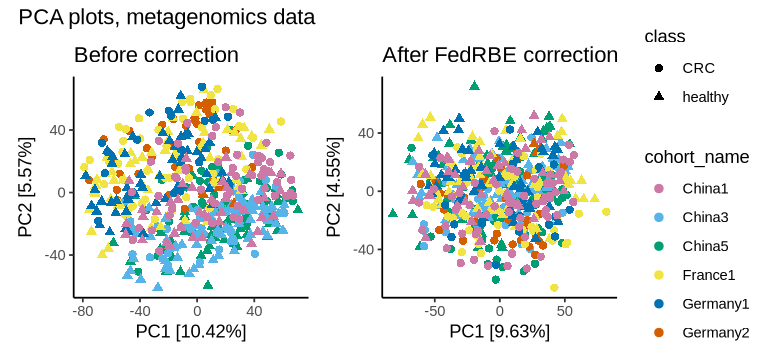

In [27]:
pca_plot_uncorrected <- pca_plot(central_uncorrected, metadata, 
    title = "Before correction",
    quantitative_col_name = "sample", shape_col = "class", col_col="cohort_name", 
    cbPalette=cbPalette,
    show_legend=F)

# pca_plot_corrected <- pca_plot(central_corrected, metadata, 
#     title = "After central correction",
#     quantitative_col_name = "sample", col_col = "class", shape_col="study_accession", 
#     cbPalette=c("#44abe7", "#c55702"),
#     show_legend=F)
pca_plot_fed <- pca_plot(fed_corrected, metadata, 
    title = "After FedRBE correction",
    quantitative_col_name = "sample", shape_col = "class", col_col = "cohort_name",
    cbPalette=cbPalette,
    show_legend=T)

layout <- (pca_plot_uncorrected + pca_plot_fed)
# add layout plot title
layout <- layout + plot_annotation("PCA plots, metagenomics data")

options(repr.plot.width=6.5, repr.plot.height=3)
layout

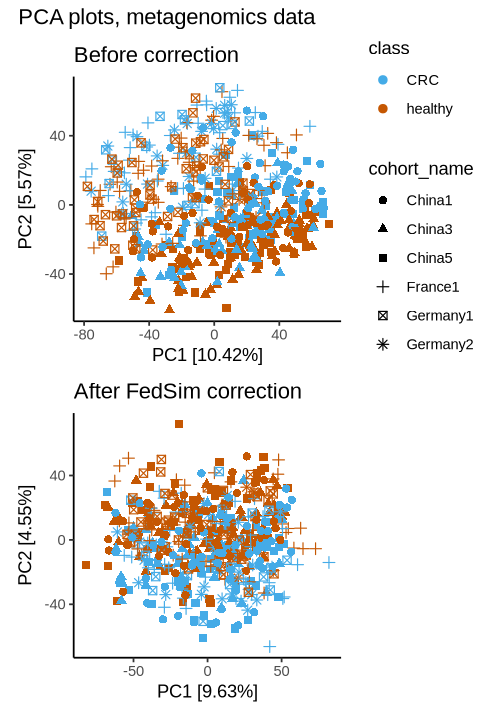

In [13]:
pca_plot_uncorrected <- pca_plot(central_uncorrected, metadata, 
    title = "Before correction",
    quantitative_col_name = "sample", col_col = "class", shape_col="cohort_name", 
    cbPalette=c("#44abe7", "#c55702"),
    show_legend=T)

pca_plot_fed <- pca_plot(fed_corrected, metadata, 
    title = "After FedSim correction",
    quantitative_col_name = "sample", col_col = "class", shape_col = "cohort_name",
    cbPalette=c("#44abe7", "#c55702"),
    show_legend=F)

layout <- pca_plot_uncorrected / pca_plot_fed
# add layout plot title
layout <- layout + plot_annotation("PCA plots, metagenomics data")

options(repr.plot.width=4.2, repr.plot.height=6)
layout

Warning message:
“Removed 76 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 100 rows containing missing values or values outside the scale range
(`geom_violin()`).”


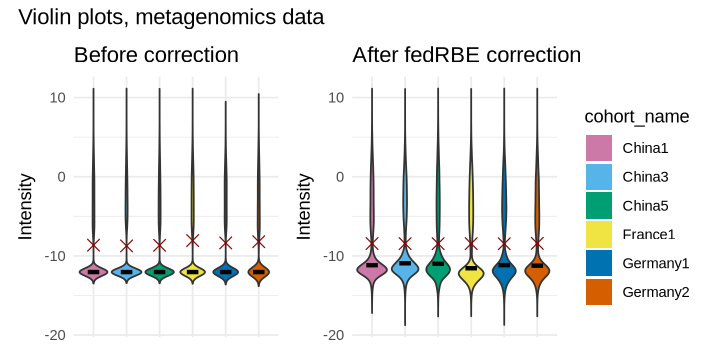

In [14]:
# Determine the shared Y-axis limits
y_min <- min(central_corrected, min(central_uncorrected, na.rm = TRUE), na.rm = TRUE)
y_max <- max(central_corrected,  max(central_uncorrected, na.rm = TRUE), na.rm = TRUE)
y_limits <- c(y_min, y_max)

boxplots_uncorrected <- boxplot_plot_groupped(central_uncorrected, metadata,
    title = "Before correction",
    quantitativeColumnName = "sample",
    color_col = "cohort_name", remove_xnames = T, show_legend=F, y_limits = y_limits, 
    cbPalette = cbPalette)

# boxplots_corrected <- boxplot_plot_groupped(central_corrected, metadata, 
#     title = "After central correction",
#     quantitativeColumnName = "sample",
#     color_col = "study_accession", remove_xnames = T, show_legend=F, y_limits = y_limits,
#     cbPalette = cbPalette)
boxplots_fed <- boxplot_plot_groupped(fed_corrected, metadata, 
    title = "After fedRBE correction",
    quantitativeColumnName = "sample",
    color_col = "cohort_name", remove_xnames = T, show_legend=T, y_limits = y_limits,
    cbPalette = cbPalette)

options(repr.plot.width=6, repr.plot.height=3)
layout <- boxplots_uncorrected | boxplots_fed
layout <- layout + plot_annotation("Violin plots, metagenomics data")
layout

Warning message:
“Removed 76 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 100 rows containing missing values or values outside the scale range
(`geom_violin()`).”


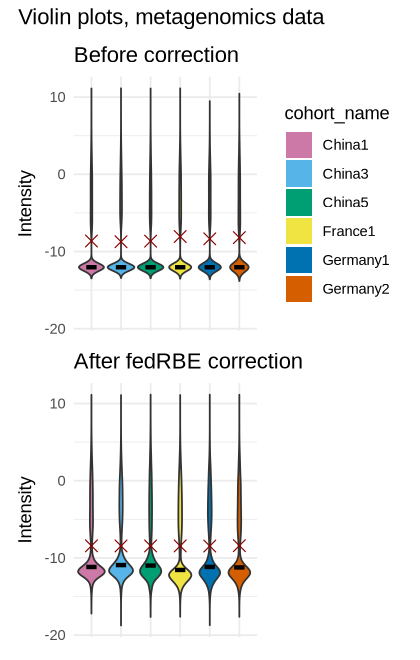

In [15]:
boxplots_uncorrected <- boxplot_plot_groupped(central_uncorrected, metadata,
    title = "Before correction",
    quantitativeColumnName = "sample",
    color_col = "cohort_name", remove_xnames = T, show_legend=T, y_limits = y_limits, 
    cbPalette = cbPalette)

boxplots_fed <- boxplot_plot_groupped(fed_corrected, metadata, 
    title = "After fedRBE correction",
    quantitativeColumnName = "sample",
    color_col = "cohort_name", remove_xnames = T, show_legend=F, y_limits = y_limits,
    cbPalette = cbPalette)

options(repr.plot.width=3.5, repr.plot.height=5.5)
layout <- boxplots_uncorrected /
          boxplots_fed
layout <- layout + plot_annotation("Violin plots, metagenomics data")
layout

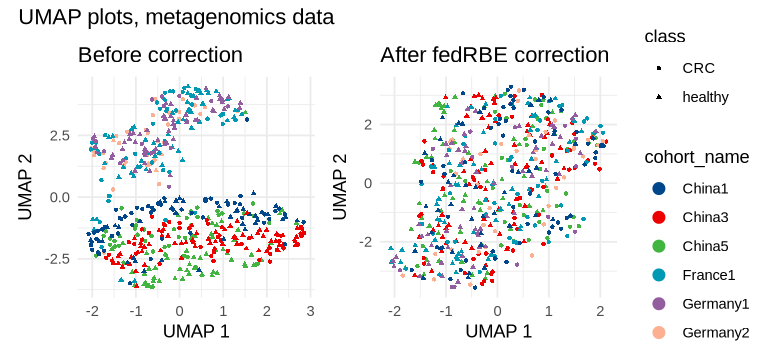

In [17]:
umap_plot_before <- umap_plot(
    central_uncorrected, metadata, 
    title = "Before correction",
    color_column = "cohort_name",
    show_legend = F)
umap_plot_after <- umap_plot(
    fed_corrected, metadata, 
    title = "After fedRBE correction",
    color_column = "cohort_name",
    show_legend = T)

layout <- umap_plot_before + umap_plot_after

options(repr.plot.width=6.5, repr.plot.height=3)
layout <- layout + plot_annotation("UMAP plots, metagenomics data")
layout

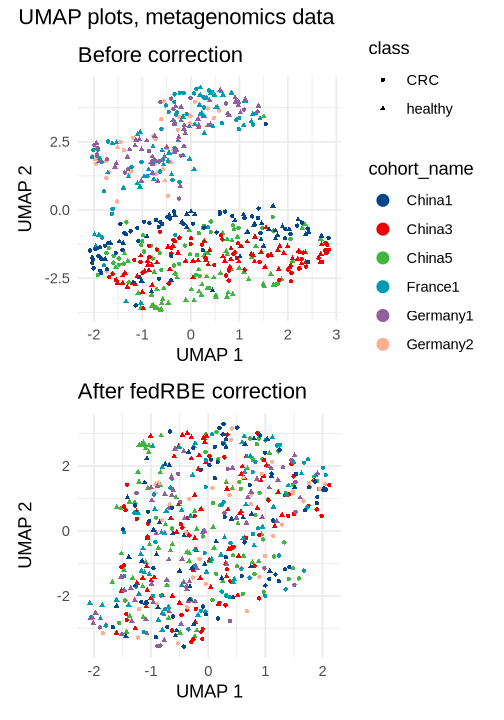

In [19]:
umap_plot_before <- umap_plot(
    central_uncorrected, metadata, 
    title = "Before correction",
    color_column = "cohort_name",
    show_legend = T)
umap_plot_after <- umap_plot(
    fed_corrected, metadata, 
    title = "After fedRBE correction",
    color_column = "cohort_name",
    show_legend = F)

layout <- umap_plot_before / umap_plot_after
options(repr.plot.width=4.2, repr.plot.height=6)
layout <- layout + plot_annotation("UMAP plots, metagenomics data")

layout

##  Linear model per variable

Following batch effect correction, the percentage of variance explained by the condition should be greater than the batch.

In [20]:
form <- ~ class + cohort_name

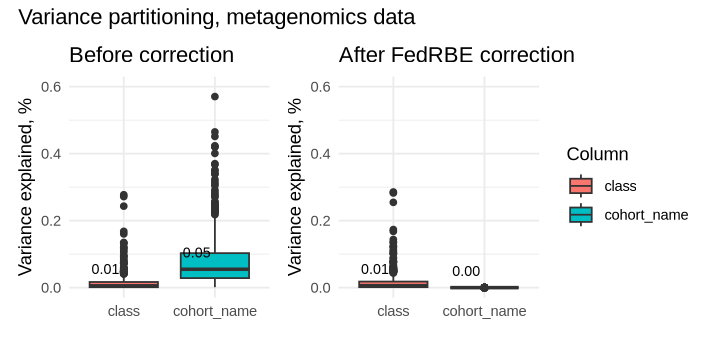

In [21]:
max_yval = 0.6

lmpv_plot_uncorrected <- lmpv_plot(central_uncorrected, metadata, 
    title = paste("Before correction"), max_yval=max_yval, form=form,
    show_legend=F)

# lmpv_plots_corrected <- lmpv_plot(central_corrected, metadata, 
#     title = paste("Before correction"), max_yval=max_yval, form=form,
#     show_legend=F)
lmpv_plot_fed <- lmpv_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"), max_yval=max_yval, form=form,
    show_legend=T)


layout <- (lmpv_plot_uncorrected + lmpv_plot_fed)
layout <- layout + plot_annotation("Variance partitioning, metagenomics data")
options(repr.plot.width=6, repr.plot.height=3)
layout

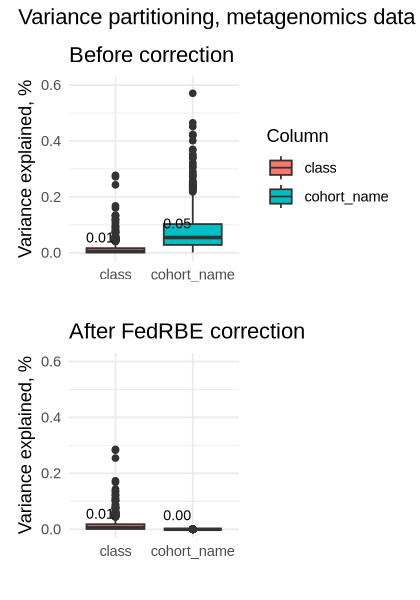

In [22]:
max_yval = 0.6

lmpv_plot_uncorrected <- lmpv_plot(central_uncorrected, metadata, 
    title = paste("Before correction"), max_yval=max_yval, form=form,
    show_legend=T)

lmpv_plot_fed <- lmpv_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"), max_yval=max_yval, form=form,
    show_legend=F)


layout <- lmpv_plot_uncorrected / lmpv_plot_fed
layout <- layout + plot_annotation("Variance partitioning, metagenomics data")
options(repr.plot.width=3.5, repr.plot.height=5)
layout

# Errors

In [23]:
# calculate differences between central and fedRBE corrected data
# print it as a table
differences <- calculated_differences(central_corrected, fed_corrected)
cat("Min difference:", differences[2], "\n")
cat("Mean difference:", differences[3], "\n")
cat("Max difference:", differences[1], "\n")

Min difference: 0 
Mean difference: 3.096603e-14 
Max difference: 1.207923e-13 


In [24]:
# Combine the data frames into a single data frame for easy plotting
data <- data.frame(
  Expression = as.vector(rowMeans(central_corrected, na.rm = TRUE)),    # calculate the mean expression for each row
  Error = as.vector(rowMeans(abs(central_corrected - fed_corrected), na.rm = TRUE)),    # calculate the mean absolute difference between the two data sets
  MaxError = as.vector(apply(abs(central_corrected - fed_corrected), 1, max, na.rm = TRUE))    # calculate the maximum absolute difference between the two data sets
)

`geom_smooth()` using formula = 'y ~ x'


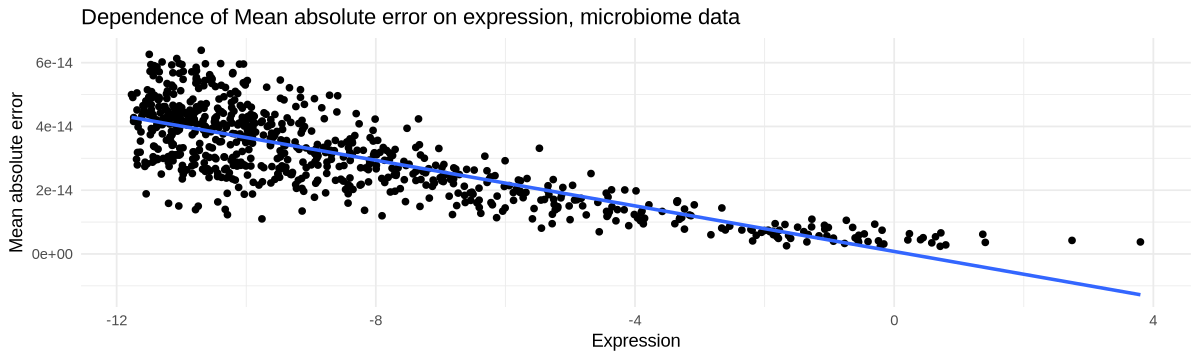

In [25]:
options(repr.plot.width=10, repr.plot.height=3)
# Plot the data
ggplot(data, aes(x = Expression, y = Error)) +
  geom_point() +  # Scatter plot of Expression vs. Error
  geom_smooth(method = "lm", se = FALSE) +  # Add a trend line (optional)
  labs(title = "Dependence of Mean absolute error on expression, microbiome data",
       x = "Expression",
       y = "Mean absolute error") +
  # add y limits from 5e-14 to 5e-15
  #   scale_y_continuous(limits = c(5e-16,5e-13)) +
  theme_minimal() 
  



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


No id variables; using all as measure variables

No id variables; using all as measure variables



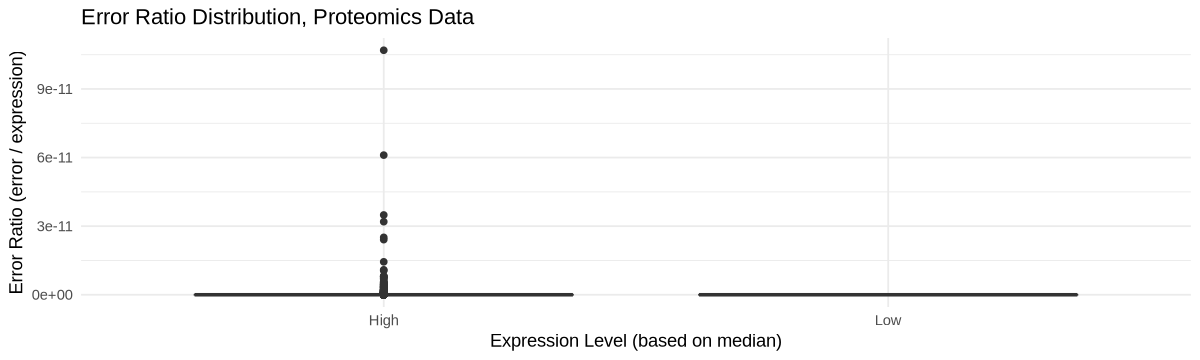

In [26]:
library(reshape2)

# Calculate ratio expression errors (assuming both data frames are of the same dimensions)
ratio_expr_errors <- abs(abs(central_corrected - fed_corrected) / central_corrected)

# Calculate the median expression value across the entire central_corrected dataframe
median_expression <- median(as.matrix(central_corrected), na.rm = TRUE)

# Melt the data frames to convert them to long format
ratio_expr_errors_long <- melt(ratio_expr_errors, varnames = c("Row", "Column"), value.name = "ErrorRatio")
central_corrected_long <- melt(central_corrected, varnames = c("Row", "Column"), value.name = "ExpressionValue")

# Combine the melted data frames
combined_data <- ratio_expr_errors_long
combined_data$ExpressionValue <- central_corrected_long$ExpressionValue
combined_data <- na.omit(combined_data)

# Add a column to determine if each value is 'Low' or 'High' based on the median expression value
combined_data$ExpressionLevel <- ifelse(combined_data$ExpressionValue < median_expression, "Low", "High")

# Plot as two boxplots
ggplot(combined_data, aes(x = ExpressionLevel, y = ErrorRatio)) +
  geom_boxplot() +
  labs(
    title = "Error Ratio Distribution, Proteomics Data",
    x = "Expression Level (based on median)",
    y = "Error Ratio (error / expression)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    axis.ticks.x = element_blank()
  )

# Session info

In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/yuliya/miniforge3/envs/fedRBE/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     utf8_1.2.4        base64enc_0.1-3  
 [5] fastmap_1.2.0     glue_1.8.0        htmltools_0.5.8.1 repr_1.1.7       
 [9] lifecycle_1.0.4   cli_3.6.3         fansi_1.0.6